# Phishing URL Detection
Dataset: https://www.kaggle.com/datasets/yuvistrange/content-based-features-phishing-and-legit-websites

## Motivation
The motivation for selecting the data set is to explore how certain features of a url/website affect its potential to be a phishing or scam website.

## Objective & Approach
The objective is to determine whether or not given a url's features is enough to determine if the site is a `legitimate` or `phishing` site.

KNN and Decision Tree models will be used to analyze the dataset.

Note the following:
```
classification_map = {
    '0': 'legitimate',
    '1': 'phishing'
}
```

## Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split;
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

%matplotlib inline

In [2]:
cols = list(pd.read_csv("legitimate_phishing_structured_dataset.csv", nrows=1))

data = pd.read_csv('legitimate_phishing_structured_dataset.csv', usecols=lambda col: col != 'URL')

classification_map = {
    '0': 'legitimate',
    '1': 'phishing'
}

feature_cols = [i for i in cols if i not in ['URL', 'label']]

print(data['label'].value_counts())

label
0    25000
1    25000
Name: count, dtype: int64


<Axes: >

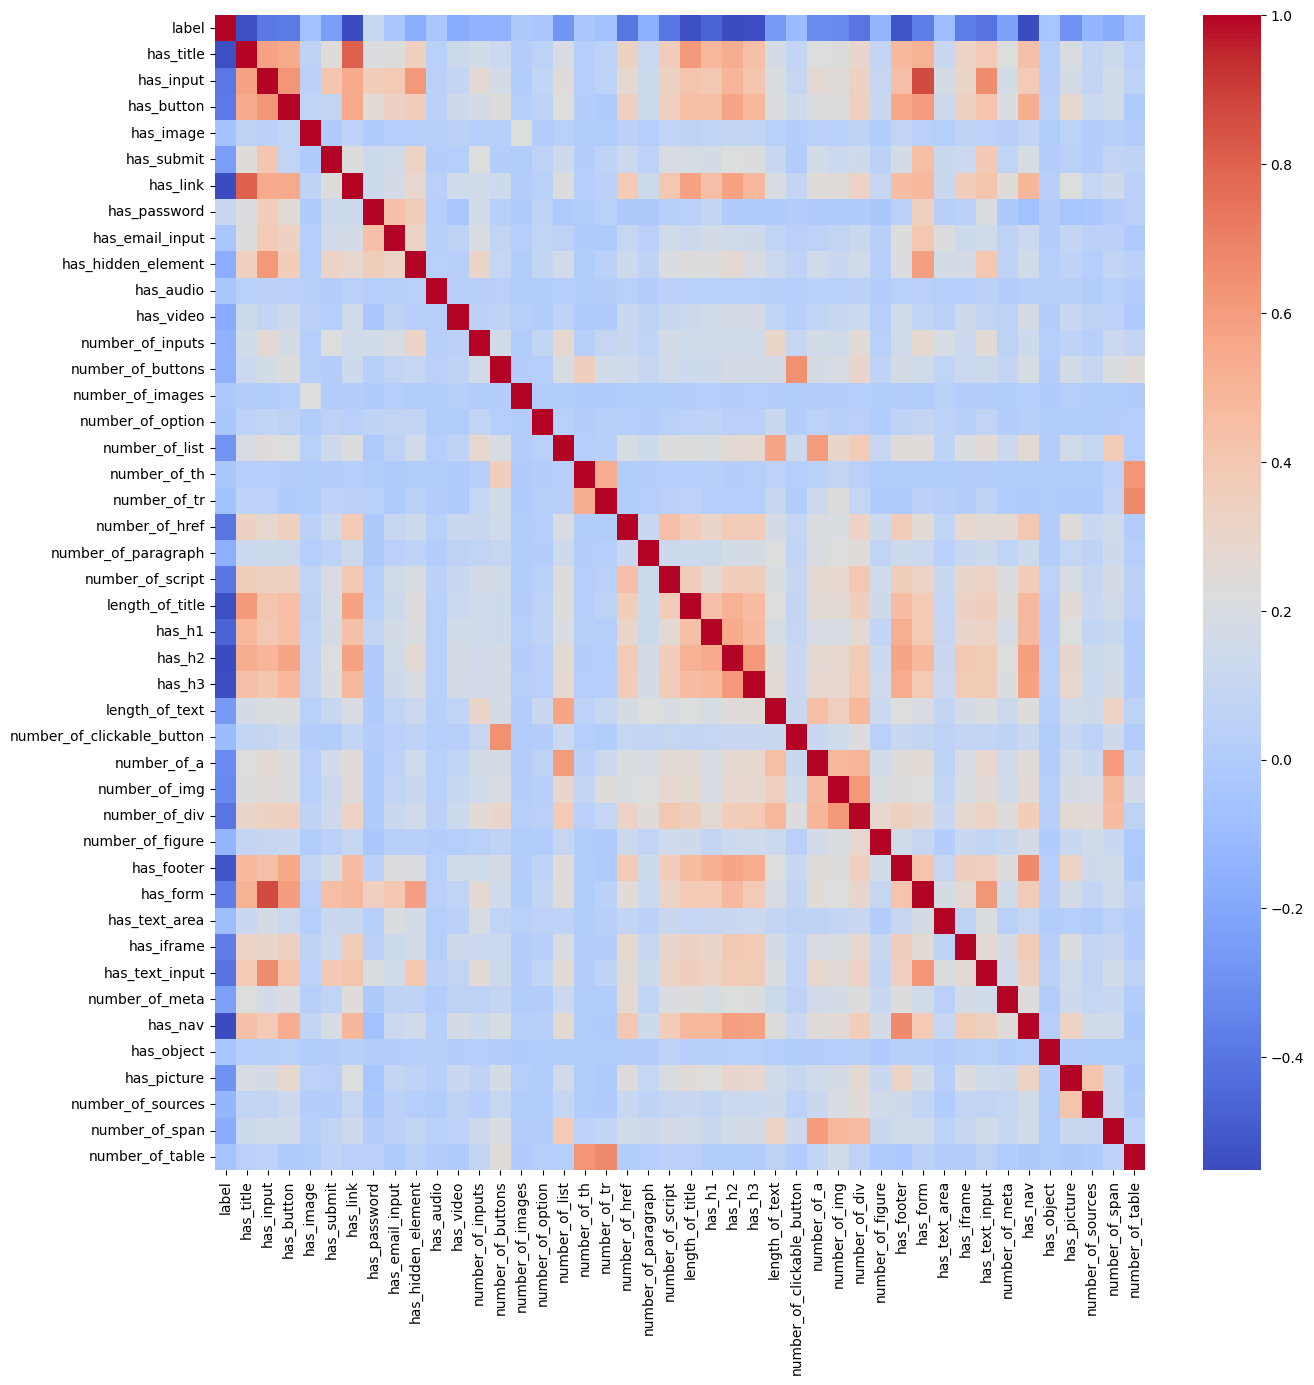

In [3]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), cmap='coolwarm')

Based on the above correlation it would be viable to remove some of the features which seem to have no effect on the label for a URL. These include the following:

- has_title
- has_link
- length_of_title
- has_h2
- has_h3
- has_footer
- has_nav


### Data Preperation

In [4]:
feature_cols = [i for i in feature_cols if i not in ['has_title', 'has_link', 'length_of_title', 'has_h2', 'has_h3', 'has_footer', 'has_nav']]
X = data[feature_cols]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# Prediction (KNN-Classifier)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 10)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

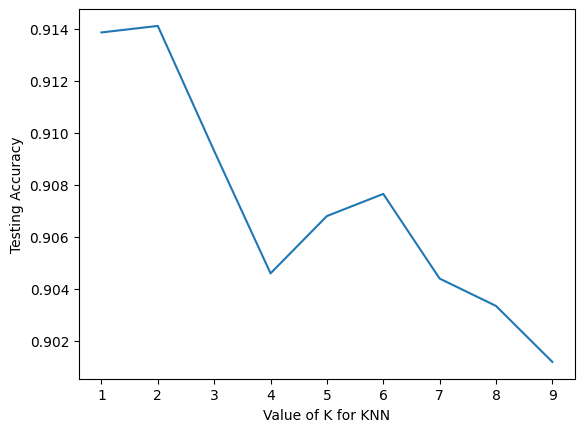

In [6]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, y)

new_X = np.array([[1,0,0,1,0,0,0,0,0,2,0,0,0,30,0,0,4,12,8,1,8045,0,96,52,137,0,1,0,1,0,13,0,0,0,7,0]])

new_Y = knn.predict(new_X)
print(classification_map[str(new_Y[0])])

legitimate


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10047
           1       0.95      0.94      0.95      9953

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



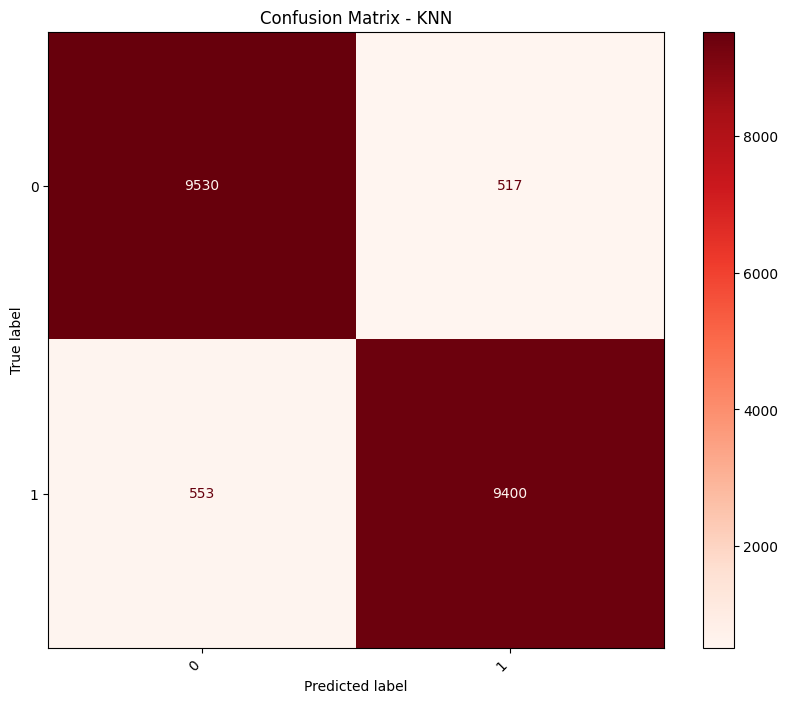

In [8]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap="Reds", ax=ax)


plt.xticks(rotation=45, ha="right")
plt.title(f"Confusion Matrix - KNN")
plt.show()

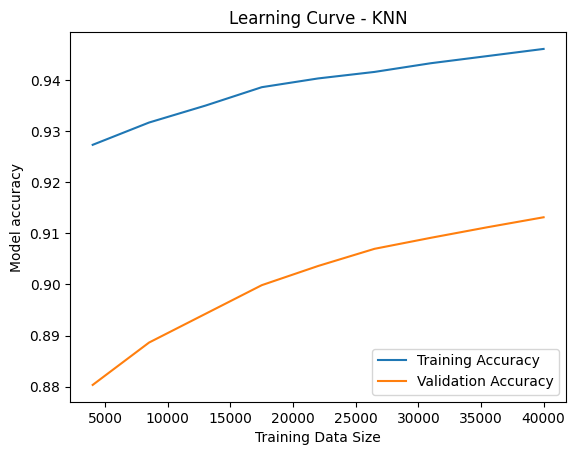

In [9]:
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5, train_sizes = np.linspace(0.1, 1.0, 9))

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_mean, label='Training Accuracy')
plt.plot(train_sizes,test_mean, label='Validation Accuracy')
plt.title('Learning Curve - KNN')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.legend(loc='lower right')
plt.show()

# Prediction (DecisionTreeClassifier)

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="entropy", random_state=4)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9257

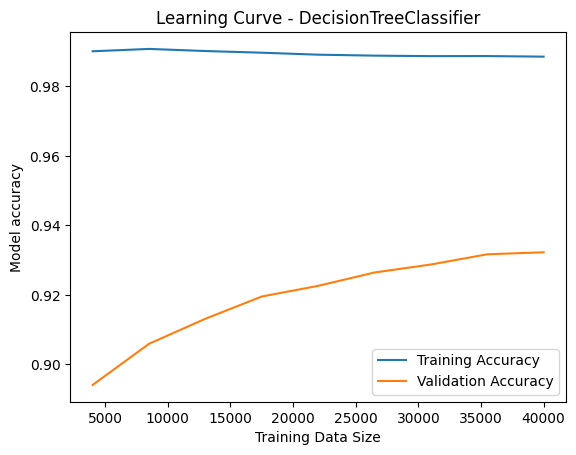

In [11]:
train_sizes, train_scores, test_scores = learning_curve(dtree, X, y, cv=5, train_sizes = np.linspace(0.1, 1.0, 9))

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_mean, label='Training Accuracy')
plt.plot(train_sizes,test_mean, label='Validation Accuracy')
plt.title('Learning Curve - DecisionTreeClassifier')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.legend(loc='lower right')
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV

sample_split_range = list(range(2, 50))

param_grid = {'min_samples_split': list(range(2, 50)), 'criterion': ['gini', 'entropy']}

grid = GridSearchCV(dtree, param_grid, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29, 30, 31, ...]},
             scoring='accuracy')

In [13]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9282666666666668
{'criterion': 'entropy', 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', random_state=4)


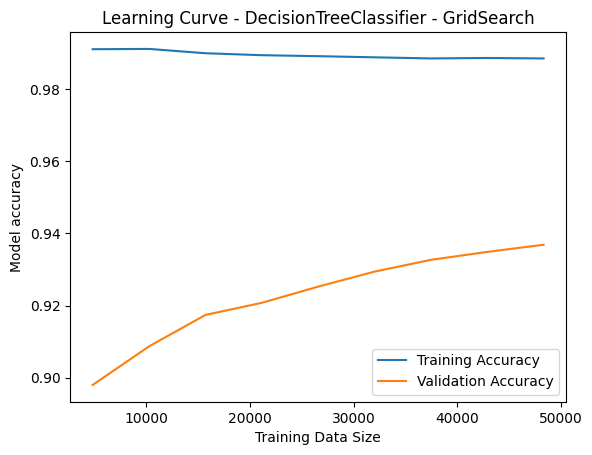

In [14]:
train_sizes, train_scores, test_scores = learning_curve(grid.best_estimator_, X, y, cv=30, train_sizes = np.linspace(0.1, 1.0, 9))

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_mean, label='Training Accuracy')
plt.plot(train_sizes,test_mean, label='Validation Accuracy')
plt.title('Learning Curve - DecisionTreeClassifier - GridSearch')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10047
           1       0.91      0.95      0.93      9953

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000



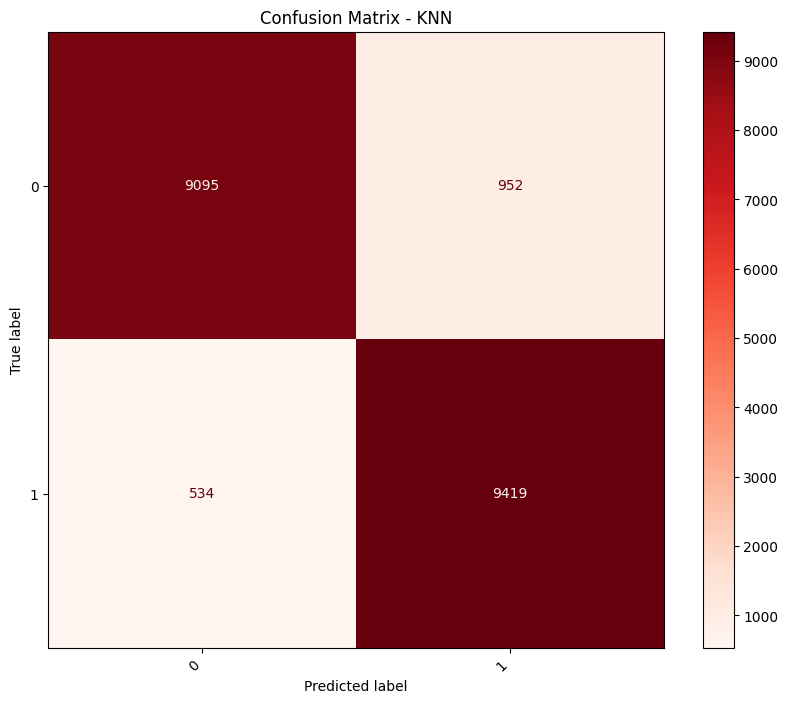

In [15]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap="Reds", ax=ax)


plt.xticks(rotation=45, ha="right")
plt.title(f"Confusion Matrix - KNN")
plt.show()

# Conclusions

In this analysis,  two machine learning models, K-Nearest Neighbors and Decision Tree, for predicting the status of URLs (phishing or legitimate) based on a variety of features, found in the url and on the site page itself. Both models performed similary.

## Key Findings
### Model Performance:

The KNN classifier achieved a higher accuracy (95%) compared to the Decision Tree (93%). This suggests that KNN was better able to capture the underlying patterns in the data for this specific problem.

Despite the difference in accuracy, both models appear to have converging learning curves. However, a wide range still exists between training and validation acccuracies. Significantly increasing the size of the dataset would like lead to the curves converging.

## Prediction Results
A DecisionTreeClassifier is the better choice for this dataset. Although its accuracy was slightly lower we gain more information through information gain on each feature with the dataset, and the learning curves are converging at a quicker rate than that of KNN.

## Final Thoughts
Both models provided good insight into the data, although each had poor learning curves, if the dataset was significantly larger we would see these curves converge and both models would provide an even more accuract result.